In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
from potters import plot_df
from get_turn import plot_changepoints, get_turns_and_rise_from_files
from path_prefix import PATH_PREFIX

In [4]:
df = pd.read_csv(f'{PATH_PREFIX}/data/osstate/extracted/states_2022-04-04-00.csv.gz', compression='gzip')
df.head()

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact
0,1649030400,7c02dc,-37.662643,145.395053,50.857154,38.840837,5.20192,AUM,False,False,False,4001.0,1615.44,1676.40,1.649030e+09,1.649030e+09
1,1649030400,4bcda5,51.315422,13.289487,212.396729,305.035400,NaN,SXS8VH,False,False,False,3212.0,12192.00,11818.62,1.649030e+09,1.649030e+09
2,1649030400,4bcc67,52.009878,10.625668,222.004883,123.469849,NaN,THY4RK,False,False,False,7601.0,7978.14,7795.26,1.649030e+09,1.649030e+09
3,1649030400,4bb467,51.396189,11.958468,136.096680,240.820312,NaN,MNB9346,False,False,False,3606.0,2628.90,2583.18,1.649030e+09,1.649030e+09
4,1649030400,4520c4,51.117604,6.894822,229.352295,258.612671,NaN,BCS55G,False,False,False,1000.0,10195.56,9989.82,1.649030e+09,1.649030e+09


In [7]:
# Load the .turns and .climbs file
df_turns = pd.read_csv(f'{PATH_PREFIX}/data/osstate/routes/states_2022-04-04-00.turns')
df_rises = pd.read_csv(f'{PATH_PREFIX}/data/osstate/routes/states_2022-04-04-00.climbs')
print('There are {} turns and {} rises loaded'.format(len(df_turns), len(df_rises)))

There are 8199 turns and 9493 rises loaded


In [23]:
ident = 'AAL1373_ad6884'

In [24]:
# Retrieve the TurnAndRise object corresponding to the ident
tr = get_turns_and_rise_from_files(df_turns, df_rises, ident)
tr

{'tp_time': array([1.64903041e+09, 1.64903139e+09, 1.64903180e+09, 1.64903205e+09,
        1.64903215e+09, 1.64903226e+09]),
 'tp_lat': array([37.08151245, 35.73428914, 35.26977539, 35.01074788, 35.01329041,
        35.09394836]),
 'tp_lon': array([-79.22068819, -80.50787094, -80.83665848, -80.82445242,
        -80.91369006, -80.92518086]),
 'tp_alt': array([10496.55,  4579.62,  2689.86,  1501.14,  1203.96,   845.82]),
 'tp_vel': array([0.20396391, 0.20396391, 0.20579882, 0.1459612 , 0.11081187,
        0.09293702]),
 'landed': True,
 'ident': 'AAL1373_ad6884',
 'dp_time': array([1.64903041e+09, 1.64903060e+09, 1.64903081e+09, 1.64903097e+09,
        1.64903117e+09, 1.64903138e+09, 1.64903159e+09, 1.64903183e+09,
        1.64903205e+09, 1.64903226e+09]),
 'dp_lat': array([37.08883667, 36.82420349, 36.52478027, 36.2878418 , 36.00791931,
        35.74804688, 35.48858643, 35.2348938 , 35.00930786, 35.09394836]),
 'dp_lon': array([-79.21241923, -79.50977325, -79.842453  , -80.0460434 ,
   

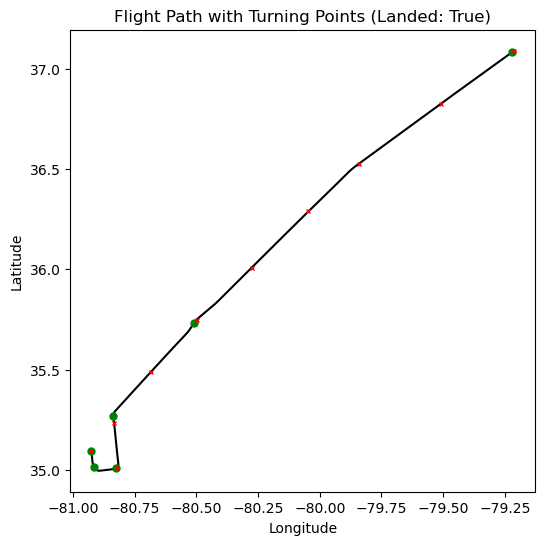

In [25]:
plot_changepoints(tr, df, ident)